In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.integrate import simps
from numpy import trapz

In [2]:
DO1 = pd.read_csv('ICU 1 door open.csv')
DO1 = DO1.drop(range(0,4))

DO1_Alt = pd.read_csv('ICU 1 door open.csv')
DO1_Alt = DO1_Alt.drop(range(0,4))

DC1 = pd.read_csv('ICU 1 door closed.csv')
DC1 = DC1.drop(range(0,5))

DC1_Alt = pd.read_csv('ICU 1 door closed.csv')
DC1_Alt = DC1_Alt.drop(range(0,5))

NP1 = pd.read_csv('ICU 1 negative pressure.csv')
NP1 = NP1.drop(range(0,5))

NP1_Alt = pd.read_csv('ICU 1 negative pressure.csv')
NP1_Alt = NP1_Alt.drop(range(0,5))

DO2 = pd.read_csv('ICU 2 door open.csv')
DO2 = DO2.drop(range(0,7))

DO2_Alt = pd.read_csv('ICU 2 door open.csv')
DO2_Alt = DO2_Alt.drop(range(0,7))

DC2 = pd.read_csv('ICU 2 door closed.csv')
DC2 = DC2.drop(range(0,6))

DC2_Alt = pd.read_csv('ICU 2 door closed.csv')
DC2_Alt = DC2_Alt.drop(range(0,6))

EE502DO = pd.read_csv('EE 502 Door Open.csv')
EE502DO = EE502DO.drop(range(0,42))

EE502DO_Alt = pd.read_csv('EE 502 Door Open.csv')
EE502DO_Alt = EE502DO_Alt.drop(range(0,42))

EE502DC = pd.read_csv('EE 502 Door Closed.csv')
EE502DC = EE502DC.drop(range(0,39))

EE502DC_Alt = pd.read_csv('EE 502 Door Closed.csv')
EE502DC_Alt = EE502DC_Alt.drop(range(0,39))

EE502NP = pd.read_csv('EE 502 Negative Pressure.csv')
EE502NP = EE502NP.drop(range(0,4))

EE502NP_Alt = pd.read_csv('EE 502 Negative Pressure.csv')
EE502NP_Alt = EE502NP_Alt.drop(range(0,4))

EE504DO = pd.read_csv('EE 504 Door Open.csv')
EE504DO = EE504DO.drop(range(0,50))

EE504DO_Alt = pd.read_csv('EE 504 Door Open.csv')
EE504DO_Alt = EE504DO_Alt.drop(range(0,50))

In [3]:
DO1.head()

,S-01,S-02,S-03,S-04,S-05,S-06,S-07,S-08,S-09,S-10,S-12,S-13,S-14,S-15,S-16,S-18,S-19,Average,Variance
4,64.00000,54,68,58,47,89,78.000000,75.000000,76.000000,81.000000,27.000000,74.000000,64.000000,66,54,56,62,64.294118,1.444793e+03
5,50.00000,70,62,39,64,81,111.333333,135.333333,75.333333,51.666667,35.333333,33.000000,48.000000,131,48,82,76,70.176471,2.582055e+03
6,14139.66667,13,68,68,433,92,92.000000,107.000000,53.000000,57.000000,37.000000,43.000000,46.333333,132,42,77,49,914.647059,2.433194e+07
7,19896.66667,39,106,364,64,63,66.000000,54.333333,54.000000,57.000000,37.333333,39.000000,55.333333,60,35,32,66,1240.509804,5.052627e+07
8,4827.00000,80,108,655,234,107,66.000000,26.000000,55.000000,70.666667,40.000000,42.333333,51.000000,65,42,45,35,385.235294,2.530511e+06


In [4]:
## Only run this cell once. If you run it twice, run the next cell ONCE, comment it out, and run this cell once again
DO1.insert(0, "Time", np.arange(0, 920, 10), True)
DO1_Alt.insert(0, "Time", np.arange(0,920,10), True)

DC1.insert(0, "Time", np.arange(0, 910, 10), True)
DC1_Alt.insert(0, "Time", np.arange(0, 910, 10), True)

NP1.insert(0, "Time", np.arange(0, 610, 10), True)
NP1_Alt.insert(0, "Time", np.arange(0, 610, 10), True)

DO2.insert(0, "Time", np.arange(0, 590, 10), True)
DO2_Alt.insert(0, "Time", np.arange(0, 590, 10), True)

DC2.insert(0, "Time", np.arange(0, 600, 10), True)
DC2_Alt.insert(0, "Time", np.arange(0, 600, 10), True)

EE502DO.insert(0, "Time", np.arange(0, 909, 1), True)
EE502DO_Alt.insert(0, "Time", np.arange(0, 909, 1), True)

EE502DC.insert(0, "Time", np.arange(0, 912, 1), True)
EE502DC_Alt.insert(0, "Time", np.arange(0, 912, 1), True)

EE502NP.insert(0, "Time", np.arange(0, 647, 1), True)
EE502NP_Alt.insert(0, "Time", np.arange(0, 647, 1), True)

EE504DO.insert(0, "Time", np.arange(0, 601, 1), True)
EE504DO_Alt.insert(0, "Time", np.arange(0, 601, 1), True)

In [5]:
#DO1 = DO1.drop(columns=['Time'])
#DC1 = DC1.drop(columns=['Time'])
#NP1 = NP1.drop(columns=['Time'])
#DO2 = DO2.drop(columns=['Time'])
#DC2 = DC2.drop(columns=['Time'])
#EE502DO = EE502DO.drop(columns=['Time'])
#EE502DC = EE502DC.drop(columns=['Time'])
#EE502NP = EE502NP.drop(columns=['Time'])
#EE504DO = EE504DO.drop(columns=['Time'])

## For 4 Zones

In [6]:
# DO1['Zone 1'] = DO1[['S-01', 'S-07']].mean(axis=1)
# DO1['Zone 2'] = DO1[['S-04']].mean(axis=1)
# DO1['Zone 3'] = DO1[['S-02', 'S-03', 'S-05', 'S-06', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# DO1['Zone 4'] = DO1[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO1['Indoor Average'] = DO1[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# DC1['Zone 1'] = DC1[['S-01', 'S-04']].mean(axis=1)
# DC1['Zone 2'] = DC1[['S-06']].mean(axis=1)
# DC1['Zone 3'] = DC1[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# DC1['Zone 4'] = DC1[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DC1['Indoor Average'] = DC1[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# NP1['Zone 1'] = NP1[['S-06']].mean(axis=1)
# NP1['Zone 2'] = NP1[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# NP1['Zone 3'] = NP1[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# NP1['Zone 4'] = NP1[['S-12']].mean(axis=1)
# NP1['Indoor Average'] = NP1[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# # NP1['Zone 1'] = NP1[['S-06']].mean(axis=1)
# # NP1['Zone 2'] = NP1[['S-01', 'S-04']].mean(axis=1)
# # NP1['Zone 3'] = NP1[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# # NP1['Zone 4'] = NP1[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# # NP1['Indoor Average'] = NP1[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# DO2['Zone 1'] = DO2[['S-04', 'S-06', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# DO2['Zone 2'] = DO2[['S-01', 'S-08', 'S-12']].mean(axis=1)
# DO2['Zone 3'] = DO2[['S-02', 'S-03', 'S-05', 'S-07']].mean(axis=1)
# DO2['Zone 4'] = DO2[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO2['Indoor Average'] = DO2[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# DC2['Zone 1'] = DC2[['S-06', 'S-09', 'S-10']].mean(axis=1)
# DC2['Zone 2'] = DC2[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-08', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# DC2['Zone 3'] = DC2[['S-07']].mean(axis=1)
# DC2['Zone 4'] = DC2[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DC2['Indoor Average'] = DC2[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# EE502DO['Zone 1'] = EE502DO[['S-01', 'S-03', 'S-04', 'S-05', 'S-06']].mean(axis=1)
# EE502DO['Zone 2'] = EE502DO[['S-07', 'S-09', 'S-10', 'S-11', 'S-12']].mean(axis=1)
# EE502DO['Zone 3'] = EE502DO[['S-02', 'S-08', 'S-13', 'S-15']].mean(axis=1)
# EE502DO['Zone 4'] = EE502DO[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502DO['Indoor Average'] = EE502DO[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502DC['Zone 1'] = EE502DC[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
# EE502DC['Zone 2'] = EE502DC[['S-07', 'S-08', 'S-09', 'S-11', 'S-15']].mean(axis=1)
# EE502DC['Zone 3'] = EE502DC[['S-02', 'S-13']].mean(axis=1)
# EE502DC['Zone 4'] = EE502DC[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502DC['Indoor Average'] = EE502DC[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502NP['Zone 1'] = EE502NP[['S-03', 'S-04']].mean(axis=1)
# EE502NP['Zone 2'] = EE502NP[['S-01', 'S-05', 'S-06', 'S-08', 'S-12']].mean(axis=1)
# EE502NP['Zone 3'] = EE502NP[['S-02', 'S-07', 'S-09', 'S-10', 'S-11', 'S-13', 'S-15']].mean(axis=1)
# EE502NP['Zone 4'] = EE502NP[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502NP['Indoor Average'] = EE502NP[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE504DO['Zone 1'] = EE504DO[['S-05', 'S-06', 'S-08', 'S-10', 'S-12', 'S-15']].mean(axis=1)
# EE504DO['Zone 2'] = EE504DO[['S-01','S-03']].mean(axis=1)
# EE504DO['Zone 3'] = EE504DO[['S-02', 'S-04', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13']].mean(axis=1)
# EE504DO['Zone 4'] = EE504DO[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE504DO['Indoor Average'] = EE504DO[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)


## For 3 Zones

In [7]:
DC1_Alt['Zone 1'] = DC1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
DC1_Alt['Zone 2'] = DC1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DC1_Alt['Zone 3'] = DC1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DC1_Alt['Indoor Average'] = DC1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

# DO1_Alt['Zone 1'] = DO1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
# DO1_Alt['Zone 2'] = DO1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# DO1_Alt['Zone 3'] = DO1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO1_Alt['Indoor Average'] = DO1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

# NP1_Alt['Zone 1'] = NP1_Alt[['S-01', 'S-04', 'S-06']].mean(axis=1)
# NP1_Alt['Zone 2'] = NP1_Alt[['S-02', 'S-03', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
# NP1_Alt['Zone 3'] = NP1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# NP1_Alt['Indoor Average'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)

NP1_Alt['Zone 1'] = NP1_Alt[['S-06']].mean(axis=1)
NP1_Alt['Zone 2'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
NP1_Alt['Zone 3'] = NP1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
NP1_Alt['Indoor Average'] = NP1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

DO1_Alt['Zone 1'] = DO1_Alt[['S-01', 'S-06']].mean(axis=1)
DO1_Alt['Zone 2'] = DO1_Alt[['S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DO1_Alt['Zone 3'] = DO1_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DO1_Alt['Indoor Average'] = DO1_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)




DC2_Alt['Zone 1'] = DC2_Alt[['S-06', 'S-09', 'S-10']].mean(axis=1)
DC2_Alt['Zone 2'] = DC2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-12', 'S-13', 'S-14']].mean(axis=1)
DC2_Alt['Zone 3'] = DC2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DC2_Alt['Indoor Average'] = DC2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

# DO2_Alt['Zone 1'] = DO2_Alt[['S-06', 'S-09', 'S-10']].mean(axis=1)
# DO2_Alt['Zone 2'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-07', 'S-08', 'S-12', 'S-13', 'S-14']].mean(axis=1)
# DO2_Alt['Zone 3'] = DO2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
# DO2_Alt['Indoor Average'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)

DO2_Alt['Zone 1'] = DO2_Alt[['S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-10', 'S-13', 'S-14']].mean(axis=1)
DO2_Alt['Zone 2'] = DO2_Alt[['S-01', 'S-08', 'S-12']].mean(axis=1)
DO2_Alt['Zone 3'] = DO2_Alt[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)
DO2_Alt['Indoor Average'] = DO2_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)



EE502DC_Alt['Zone 1'] = EE502DC_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
EE502DC_Alt['Zone 2'] = EE502DC_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
EE502DC_Alt['Zone 3'] = EE502DC_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502DC_Alt['Indoor Average'] = EE502DC_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502DO_Alt['Zone 1'] = EE502DO_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
# EE502DO_Alt['Zone 2'] = EE502DO_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
# EE502DO_Alt['Zone 3'] = EE502DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502DO_Alt['Indoor Average'] = EE502DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

# EE502NP_Alt['Zone 1'] = EE502NP_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-10', 'S-12']].mean(axis=1)
# EE502NP_Alt['Zone 2'] = EE502NP_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-11', 'S-13', 'S-15']].mean(axis=1)
# EE502NP_Alt['Zone 3'] = EE502NP_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
# EE502NP_Alt['Indoor Average'] = EE502NP_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

EE502DO_Alt['Zone 1'] = EE502DO_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-09', 'S-10', 'S-11', 'S-12']].mean(axis=1)
EE502DO_Alt['Zone 2'] = EE502DO_Alt[['S-02', 'S-08', 'S-13', 'S-15']].mean(axis=1)
EE502DO_Alt['Zone 3'] = EE502DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502DO_Alt['Indoor Average'] = EE502DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)

EE502NP_Alt['Zone 1'] = EE502NP_Alt[['S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-12']].mean(axis=1)
EE502NP_Alt['Zone 2'] = EE502NP_Alt[['S-02', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-13', 'S-15']].mean(axis=1)
EE502NP_Alt['Zone 3'] = EE502NP_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE502NP_Alt['Indoor Average'] = EE502NP_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)



EE504DO_Alt['Zone 1'] = EE504DO_Alt[['S-01', 'S-03', 'S-06']].mean(axis=1)
EE504DO_Alt['Zone 2'] = EE504DO_Alt[['S-02', 'S-04', 'S-05', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)
EE504DO_Alt['Zone 3'] = EE504DO_Alt[['S-16', 'S-17', 'S-18', 'S-19']].mean(axis=1)
EE504DO_Alt['Indoor Average'] = EE504DO_Alt[['S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15']].mean(axis=1)


In [8]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(DO1['Time'], DO1['Zone 1']/(100*138))
# plt.semilogy(DO1['Time'], DO1['Zone 2']/(100*138))
# plt.semilogy(DO1['Time'], DO1['Zone 3']/(100*138))
# plt.semilogy(DO1['Time'], DO1['Zone 4']/(100*138))
# plt.semilogy(DO1['Time'], DO1['Average']/(100*138), linewidth = 3, linestyle = '--')
# #plt.semilogy(DO1['Time'], DO1['Indoor Average']/(100*138), linewidth = 3, linestyle = '--')
# plt.title('ICU 1 Door Open 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.005, color='black', linestyle='-')

Inside = 1.257151070162431
Door Sensors = 0.22955611564952236
Nurse's Station = -0.031632259060170365
Outside = 0.16425902197209913


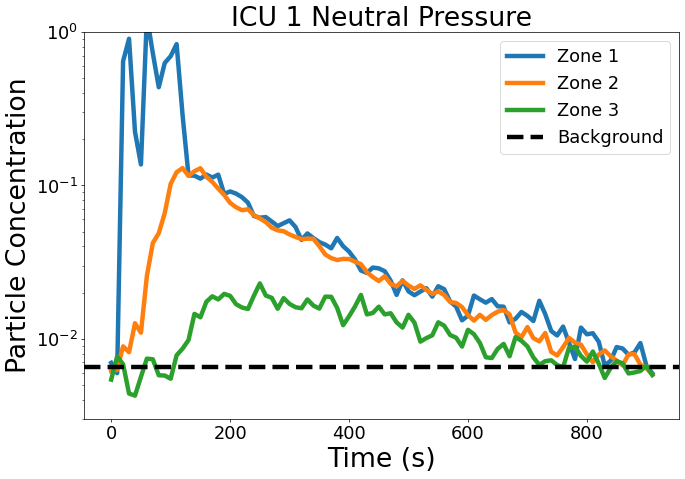

In [9]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 1']/(100*110), linewidth=5.0)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 2']/(100*110), linewidth=5.0)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Zone 3']/(100*110), linewidth=5.0)
plt.title('ICU 1 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(DO1_Alt['Zone 1']/(100*110) - 0.0065, dx=0.01)
#print("area 1 =", area_1)

Zone_2 = simps(DO1_Alt['Zone 2']/(100*110) - 0.0065, dx=0.01)
#print("area 2 =", area_2)

Zone_3 = simps(DO1_Alt['Zone 3']/(100*110) - 0.0065, dx=0.01)
#print("area 3 =", area_3)




inside = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14'])/(100*110))/13 - 0.0065, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((DO1_Alt['S-15']+DO1_Alt['S-18']+DO1_Alt['S-19'])/3)/(100*110) - 0.0065, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(DO1_Alt['S-16']/(100*110) - 0.0065, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((DO1_Alt['S-01']+DO1_Alt['S-02']+DO1_Alt['S-03']+DO1_Alt['S-04']+DO1_Alt['S-05']+DO1_Alt['S-06']+DO1_Alt['S-07']+DO1_Alt['S-08']+DO1_Alt['S-09']+DO1_Alt['S-10']+DO1_Alt['S-12']+DO1_Alt['S-13']+DO1_Alt['S-14']+DO1_Alt['S-15']+DO1_Alt['S-16']+DO1_Alt['S-18']+DO1_Alt['S-19'])/(100*110))/17 - 0.0065, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00372867 -1.83411494]


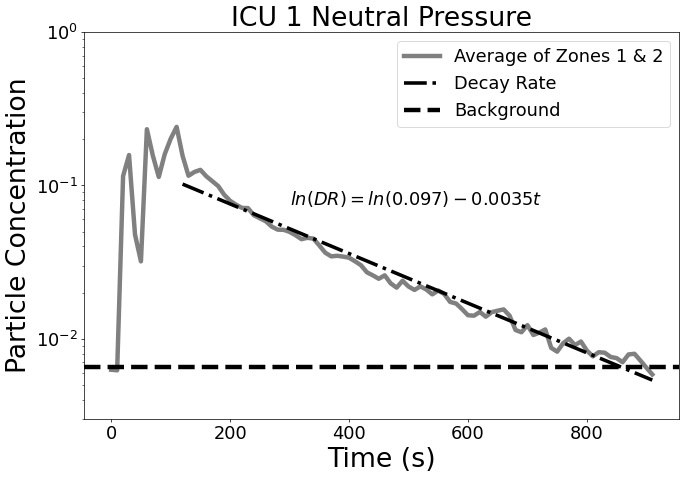

In [10]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO1_Alt['Time'], DO1_Alt['Indoor Average']/(100*110), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 1 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(DO1_Alt['Indoor Average']/(100*110))

time = DO1_Alt['Time'][12:93]
y_data = log_y_data[12:93]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0065, color='black', linestyle='--', linewidth=5.0)

plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [11]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(DC1['Time'], DC1['Zone 1']/(100*40))
# plt.semilogy(DC1['Time'], DC1['Zone 2']/(100*40))
# plt.semilogy(DC1['Time'], DC1['Zone 3']/(100*40))
# plt.semilogy(DC1['Time'], DC1['Zone 4']/(100*40))
# plt.semilogy(DC1['Time'], DC1['Average']/(100*40), linewidth = 3, linestyle = '--')
# #plt.semilogy(DC1['Time'], DC1['Indoor Average']/(100*40), linewidth = 3, linestyle = '--')
# plt.title('ICU 1 Door Closed 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.018, color='black', linestyle='-')

Inside = 1.2343525900454488
Door Sensors = 0.3320941022120195
Nurse's Station = -0.04286597722689144
Outside = 0.23835408235229183


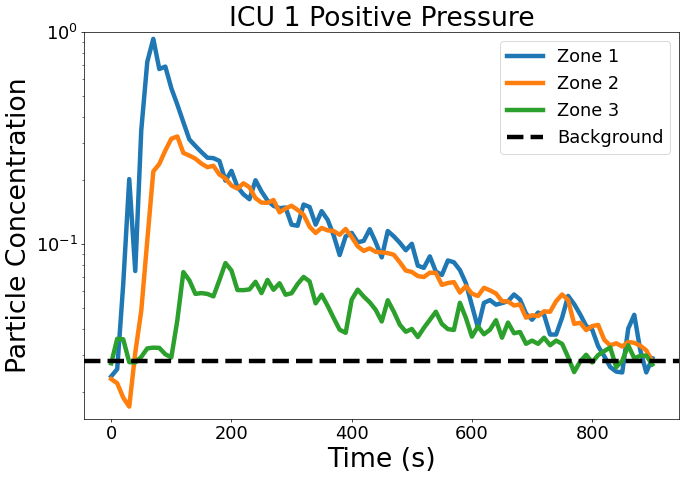

In [12]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 1']/(100*29), linewidth=5.0)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 2']/(100*29), linewidth=5.0)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Zone 3']/(100*29), linewidth=5.0)
plt.title('ICU 1 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.015, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.028, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(DC1_Alt['Zone 1']/(100*29) - 0.028, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(DC1_Alt['Zone 2']/(100*29) - 0.028, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(DC1_Alt['Zone 3']/(100*29) - 0.028, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((DC1_Alt['S-01']+DC1_Alt['S-02']+DC1_Alt['S-03']+DC1_Alt['S-04']+DC1_Alt['S-05']+DC1_Alt['S-06']+DC1_Alt['S-07']+DC1_Alt['S-08']+DC1_Alt['S-09']+DC1_Alt['S-10']+DC1_Alt['S-12']+DC1_Alt['S-13']+DC1_Alt['S-14'])/(100*29))/13 - 0.028, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((DC1_Alt['S-15']+DC1_Alt['S-18']+DC1_Alt['S-19'])/3)/(100*29) - 0.028, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(DC1_Alt['S-16']/(100*29) - 0.028, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((DC1_Alt['S-01']+DC1_Alt['S-02']+DC1_Alt['S-03']+DC1_Alt['S-04']+DC1_Alt['S-05']+DC1_Alt['S-06']+DC1_Alt['S-07']+DC1_Alt['S-08']+DC1_Alt['S-09']+DC1_Alt['S-10']+DC1_Alt['S-12']+DC1_Alt['S-13']+DC1_Alt['S-14']+DC1_Alt['S-15']+DC1_Alt['S-16']+DC1_Alt['S-18']+DC1_Alt['S-19'])/(100*29))/17 - 0.028, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00272999 -1.10095602]


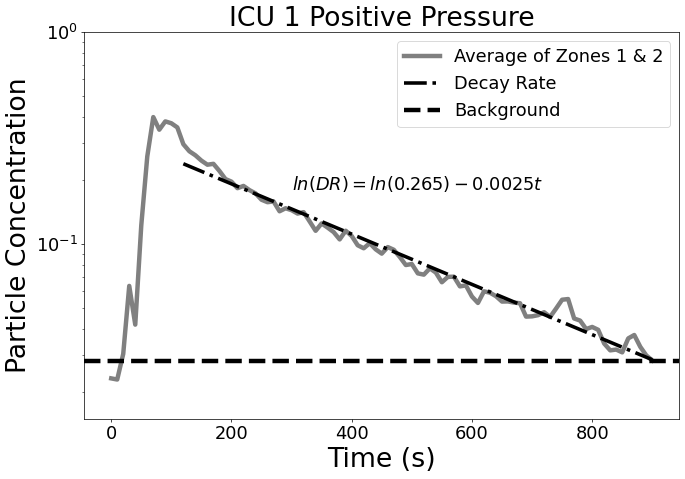

In [13]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC1_Alt['Time'], DC1_Alt['Indoor Average']/(100*29), linewidth = 5, color='gray', linestyle = '-')

plt.title('ICU 1 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.015, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)

log_y_data = np.log(DC1_Alt['Indoor Average']/(100*29))

time = DC1_Alt['Time'][12:93]
y_data = log_y_data[12:93]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.028, color='black', linestyle='--', linewidth=5.0)

plt.text(300, 0.18, '$ln(DR) = ln(0.265) - 0.0025t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [14]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(NP1['Time'], NP1['Zone 1']/(100*70))
# plt.semilogy(NP1['Time'], NP1['Zone 2']/(100*70))
# plt.semilogy(NP1['Time'], NP1['Zone 3']/(100*70))
# plt.semilogy(NP1['Time'], NP1['Zone 4']/(100*70))
# plt.semilogy(NP1['Time'], NP1['Average']/(100*70), linewidth = 3, linestyle = '--')
# #plt.semilogy(NP1['Time'], NP1['Indoor Average']/(100*70), linewidth = 3, linestyle = '--')
# plt.title('ICU 1 Negative Pressure 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.01, color='black', linestyle='-')

Inside = 1.3265005197132453
Door Sensors = -0.044645231247297586
Nurse's Station = -0.11057106253028928
Outside = -0.06112668906804552


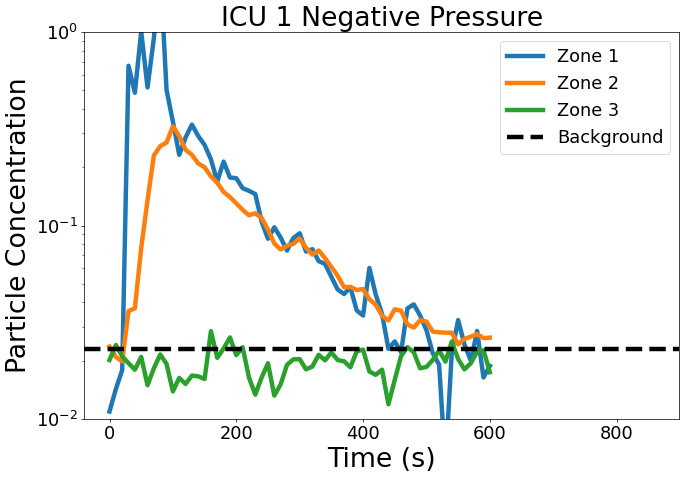

In [15]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(NP1_Alt['Time'], NP1_Alt['Zone 1']/(100*33), linewidth=5.0)
plt.semilogy(NP1_Alt['Time'], NP1_Alt['Zone 2']/(100*33), linewidth=5.0)
plt.semilogy(NP1_Alt['Time'], NP1_Alt['Zone 3']/(100*33), linewidth=5.0)
plt.title('ICU 1 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.01, 1])
plt.xlim([-40, 899])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.023, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(NP1_Alt['Zone 1']/(100*33) - 0.023, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(NP1_Alt['Zone 2']/(100*33) - 0.023, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(NP1_Alt['Zone 3']/(100*33) - 0.023, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((NP1_Alt['S-01']+NP1_Alt['S-02']+NP1_Alt['S-03']+NP1_Alt['S-04']+NP1_Alt['S-05']+NP1_Alt['S-06']+NP1_Alt['S-07']+NP1_Alt['S-08']+NP1_Alt['S-09']+NP1_Alt['S-10']+NP1_Alt['S-12']+NP1_Alt['S-13']+NP1_Alt['S-14'])/(100*33))/13 - 0.023, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((NP1_Alt['S-15']+NP1_Alt['S-18']+NP1_Alt['S-19'])/3)/(100*33) - 0.023, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(NP1_Alt['S-16']/(100*33) - 0.023, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((NP1_Alt['S-01']+NP1_Alt['S-02']+NP1_Alt['S-03']+NP1_Alt['S-04']+NP1_Alt['S-05']+NP1_Alt['S-06']+NP1_Alt['S-07']+NP1_Alt['S-08']+NP1_Alt['S-09']+NP1_Alt['S-10']+NP1_Alt['S-12']+NP1_Alt['S-13']+NP1_Alt['S-14']+NP1_Alt['S-15']+NP1_Alt['S-16']+NP1_Alt['S-18']+NP1_Alt['S-19'])/(100*33))/17 - 0.023, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00490241 -1.03817738]


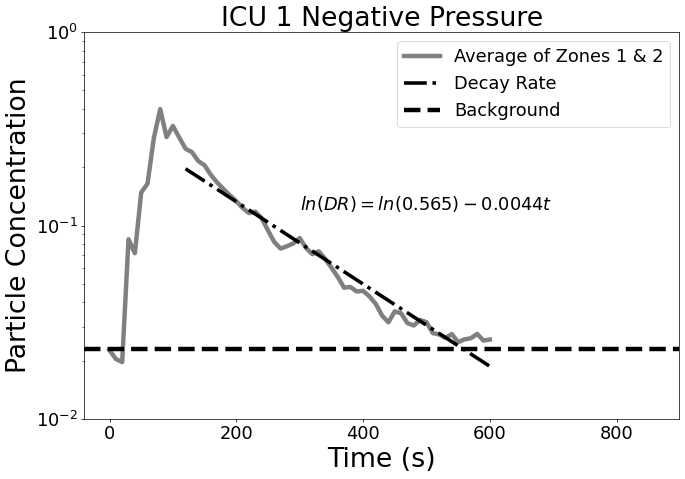

In [16]:
fig = plt.figure(1, figsize=(12,8), dpi=64)

plt.semilogy(NP1_Alt['Time'], NP1_Alt['Indoor Average']/(100*33), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 1 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.01, 1])
plt.xlim([-40, 899])
plt.xticks(size = 20)
plt.yticks(size = 20)

log_y_data = np.log(NP1_Alt['Indoor Average']/(100*33))

time = NP1_Alt['Time'][12:93]
y_data = log_y_data[12:93]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, color='black', linewidth='4.0', linestyle='dashdot')
plt.axhline(y=0.023, color='black', linestyle='--', linewidth=5.0)

plt.text(300, 0.12, '$ln(DR) = ln(0.565) - 0.0044t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [17]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(DO2['Time'], DO2['Zone 1']/(100*11))
# plt.semilogy(DO2['Time'], DO2['Zone 2']/(100*11))
# plt.semilogy(DO2['Time'], DO2['Zone 3']/(100*11))
# plt.semilogy(DO2['Time'], DO2['Zone 4']/(100*11))
# plt.semilogy(DO2['Time'], DO2['Average']/(100*11), linewidth = 3, linestyle = '--')
# #plt.semilogy(DO2['Time'], DO2['Indoor Average']/(100*11), linewidth = 3, linestyle = '--')
# plt.title('ICU 2 Door Open 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.015, color='black', linestyle='-')

Inside = 1.1836363475661449
Door Sensors = 0.517813894511756
Nurse's Station = 0.05928579810484939
Outside = 0.4031818704100292


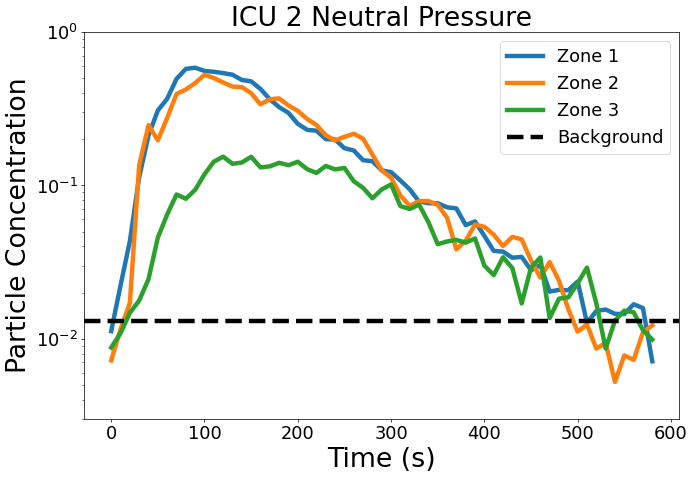

In [18]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 1']/(100*15), linewidth=5.0)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 2']/(100*15), linewidth=5.0)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Zone 3']/(100*15), linewidth=5.0)
plt.title('ICU 2 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.013, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(DO2_Alt['Zone 1']/(100*15) - 0.013, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(DO2_Alt['Zone 2']/(100*15) - 0.013, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(DO2_Alt['Zone 3']/(100*15) - 0.013, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((DO2_Alt['S-01']+DO2_Alt['S-02']+DO2_Alt['S-03']+DO2_Alt['S-04']+DO2_Alt['S-05']+DO2_Alt['S-06']+DO2_Alt['S-07']+DO2_Alt['S-08']+DO2_Alt['S-09']+DO2_Alt['S-10']+DO2_Alt['S-12']+DO2_Alt['S-13']+DO2_Alt['S-14'])/(100*15))/13 - 0.013, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((DO2_Alt['S-15']+DO2_Alt['S-18']+DO2_Alt['S-19'])/3)/(100*15) - 0.013, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(DO2_Alt['S-16']/(100*15) - 0.013, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((DO2_Alt['S-01']+DO2_Alt['S-02']+DO2_Alt['S-03']+DO2_Alt['S-04']+DO2_Alt['S-05']+DO2_Alt['S-06']+DO2_Alt['S-07']+DO2_Alt['S-08']+DO2_Alt['S-09']+DO2_Alt['S-10']+DO2_Alt['S-12']+DO2_Alt['S-13']+DO2_Alt['S-14']+DO2_Alt['S-15']+DO2_Alt['S-16']+DO2_Alt['S-18']+DO2_Alt['S-19'])/(100*15))/17 - 0.013, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00890288  0.50008159]


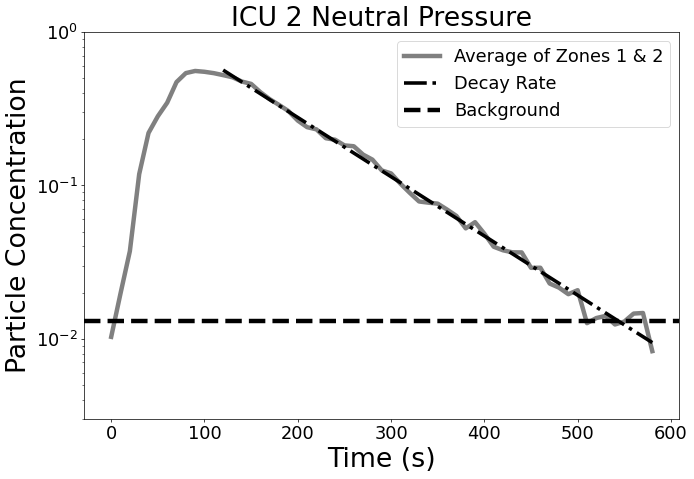

In [19]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO2_Alt['Time'], DO2_Alt['Indoor Average']/(100*15), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 2 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(DO2_Alt['Indoor Average']/(100*15))

time = DO2_Alt['Time'][12:93]
y_data = log_y_data[12:93]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.013, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [20]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(DC2['Time'], DC2['Zone 1']/(100*19))
# plt.semilogy(DC2['Time'], DC2['Zone 2']/(100*19))
# plt.semilogy(DC2['Time'], DC2['Zone 3']/(100*19))
# plt.semilogy(DC2['Time'], DC2['Zone 4']/(100*19))
# plt.semilogy(DC2['Time'], DC2['Average']/(100*19), linewidth = 3, linestyle = '--')
# #plt.semilogy(DC2['Time'], DC2['Indoor Average']/(100*19), linewidth = 3, linestyle = '--')
# plt.title('ICU 2 Door Closed 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.0014, color='black', linestyle='-')

Inside = 1.2538388141619699
Door Sensors = 0.17069270405325368
Nurse's Station = 0.18801730373463157
Outside = 0.17502385397359815


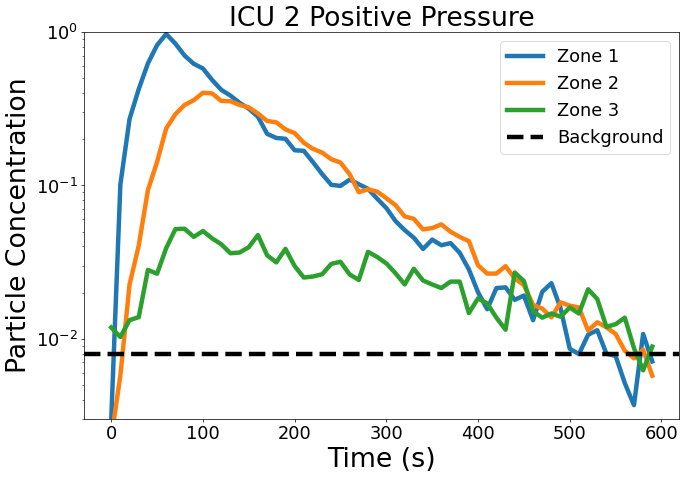

In [21]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 1']/(100*19), linewidth=5.0)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 2']/(100*19), linewidth=5.0)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Zone 3']/(100*19), linewidth=5.0)
plt.title('ICU 2 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.008, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(DC2_Alt['Zone 1']/(100*19) - 0.008, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(DC2_Alt['Zone 2']/(100*19) - 0.008, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(DC2_Alt['Zone 3']/(100*19) - 0.008, dx=0.01)
#print("area 3 =", area_3)


inside = simps(((DC2_Alt['S-01']+DC2_Alt['S-02']+DC2_Alt['S-03']+DC2_Alt['S-04']+DC2_Alt['S-05']+DC2_Alt['S-06']+DC2_Alt['S-07']+DC2_Alt['S-08']+DC2_Alt['S-09']+DC2_Alt['S-10']+DC2_Alt['S-12']+DC2_Alt['S-13']+DC2_Alt['S-14'])/(100*19))/13 - 0.008, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((DC2_Alt['S-15']+DC2_Alt['S-18']+DC2_Alt['S-19'])/3)/(100*19) - 0.008, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(DC2_Alt['S-16']/(100*19) - 0.008, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((DC2_Alt['S-01']+DC2_Alt['S-02']+DC2_Alt['S-03']+DC2_Alt['S-04']+DC2_Alt['S-05']+DC2_Alt['S-06']+DC2_Alt['S-07']+DC2_Alt['S-08']+DC2_Alt['S-09']+DC2_Alt['S-10']+DC2_Alt['S-12']+DC2_Alt['S-13']+DC2_Alt['S-14']+DC2_Alt['S-15']+DC2_Alt['S-16']+DC2_Alt['S-18']+DC2_Alt['S-19'])/(100*19))/17 - 0.008, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00878196  0.11830433]


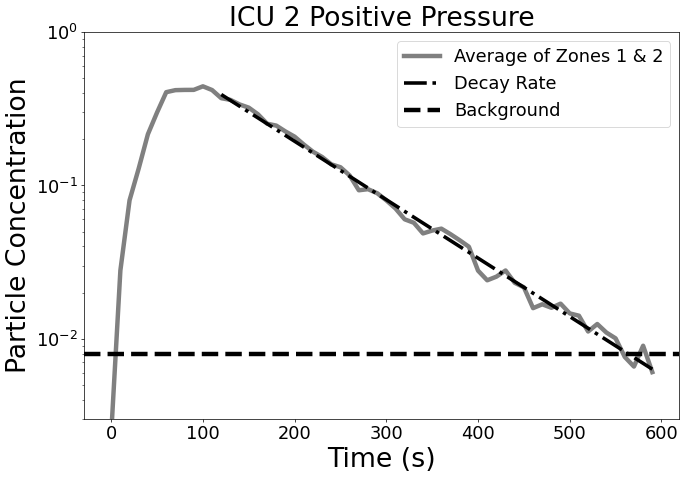

In [22]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DC2_Alt['Time'], DC2_Alt['Indoor Average']/(100*19), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 2 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(DC2_Alt['Indoor Average']/(100*19))

time = DC2_Alt['Time'][12:93]
y_data = log_y_data[12:93]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.008, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [23]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(EE502DO['Time'], EE502DO['Zone 1']/(100*120))
# plt.semilogy(EE502DO['Time'], EE502DO['Zone 2']/(100*120))
# plt.semilogy(EE502DO['Time'], EE502DO['Zone 3']/(100*120))
# plt.semilogy(EE502DO['Time'], EE502DO['Zone 4']/(100*120))
# plt.semilogy(EE502DO['Time'], EE502DO['Average']/(100*120), linewidth = 3, linestyle = '--')
# #plt.semilogy(EE502DO['Time'], EE502DO['Indoor Average']/(100*120), linewidth = 3, linestyle = '--')
# plt.title('ICU 3 Door Open 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.0022, color='black', linestyle='-')

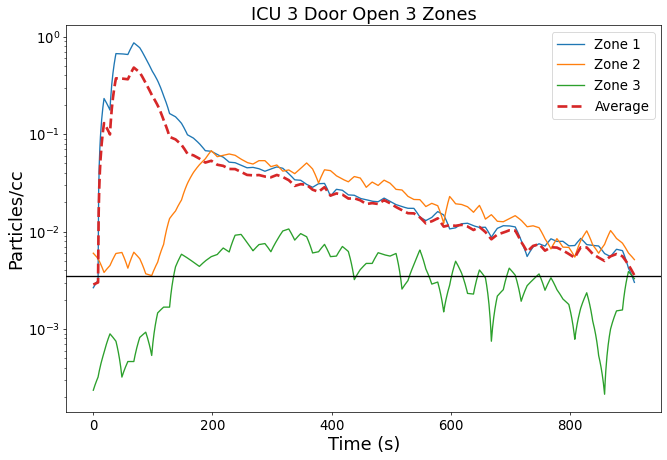

In [24]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 1']/(100*70))
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 2']/(100*70))
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 3']/(100*70))
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Average']/(100*70), linewidth = 3, linestyle = '--')
#plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Indoor Average']/(100*70), linewidth = 3, linestyle = '--')
plt.title('ICU 3 Door Open 3 Zones').set_size(20)
plt.xlabel('Time (s)').set_size(20)
plt.ylabel('Particles/cc').set_size(20)
axes = plt.gca()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Average', 'Indoor Average'], prop = {'size':15})
plt.axhline(y=0.0035, color='black', linestyle='-')

Inside = 1.2876420746860058
Door Sensors = 0.010793352936976993
Nurse's Station = -0.05936910441501253
Outside = -0.006747261401020393


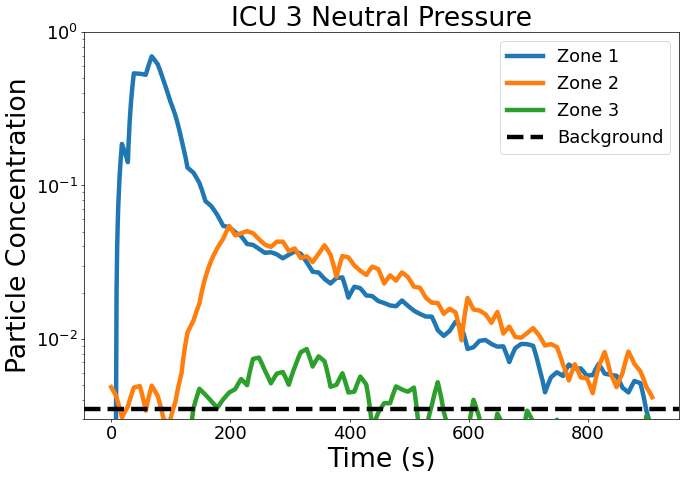

In [25]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 1']/(100*87), linewidth=5.0)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 2']/(100*87), linewidth=5.0)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Zone 3']/(100*87), linewidth=5.0)
plt.title('ICU 3 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(EE502DO_Alt['Zone 1']/(100*87) - 0.0035, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(EE502DO_Alt['Zone 2']/(100*87) - 0.0035, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(EE502DO_Alt['Zone 3']/(100*87) - 0.0035, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((EE502DO_Alt['S-01']+EE502DO_Alt['S-02']+EE502DO_Alt['S-03']+EE502DO_Alt['S-04']+EE502DO_Alt['S-05']+EE502DO_Alt['S-06']+EE502DO_Alt['S-07']+EE502DO_Alt['S-08']+EE502DO_Alt['S-09']+EE502DO_Alt['S-10']+EE502DO_Alt['S-11']+EE502DO_Alt['S-12']+EE502DO_Alt['S-13']+EE502DO_Alt['S-15'])/(100*87))/14 - 0.0035, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((EE502DO_Alt['S-16']+EE502DO_Alt['S-17']+EE502DO_Alt['S-18'])/3)/(100*87) - 0.0035, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(EE502DO_Alt['S-19']/(100*87) - 0.0035, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((EE502DO_Alt['S-01']+EE502DO_Alt['S-02']+EE502DO_Alt['S-03']+EE502DO_Alt['S-04']+EE502DO_Alt['S-05']+EE502DO_Alt['S-06']+EE502DO_Alt['S-07']+EE502DO_Alt['S-08']+EE502DO_Alt['S-09']+EE502DO_Alt['S-10']+EE502DO_Alt['S-11']+EE502DO_Alt['S-12']+EE502DO_Alt['S-13']+EE502DO_Alt['S-15']+EE502DO_Alt['S-16']+EE502DO_Alt['S-17']+EE502DO_Alt['S-18']+EE502DO_Alt['S-19'])/(100*87))/18 - 0.0035, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00364896 -2.21541601]


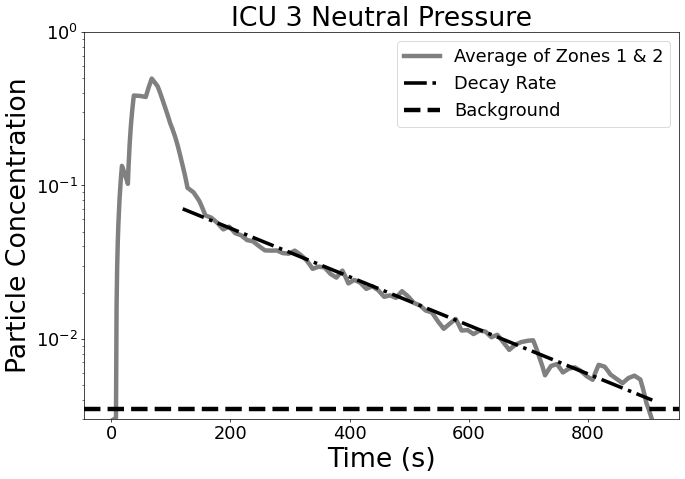

In [26]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DO_Alt['Time'], EE502DO_Alt['Indoor Average']/(100*87), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 3 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(EE502DO_Alt['Indoor Average']/(100*87))

time = EE502DO_Alt['Time'][120:920]
y_data = log_y_data[120:920]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [27]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(EE502DC['Time'], EE502DC['Zone 1']/(100*115))
# plt.semilogy(EE502DC['Time'], EE502DC['Zone 2']/(100*115))
# plt.semilogy(EE502DC['Time'], EE502DC['Zone 3']/(100*115))
# plt.semilogy(EE502DC['Time'], EE502DC['Zone 4']/(100*115))
# plt.semilogy(EE502DC['Time'], EE502DC['Average']/(100*115), linewidth = 3, linestyle = '--')
# #plt.semilogy(EE502DC['Time'], EE502DC['Indoor Average']/(100*115), linewidth = 3, linestyle = '--')
# plt.title('ICU 3 Door Closed 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.0015, color='black', linestyle='-')

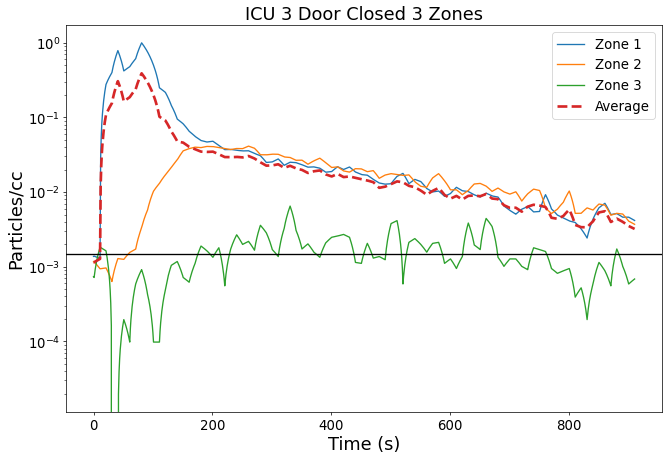

In [28]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 1']/(100*115))
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 2']/(100*115))
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 3']/(100*115))
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Average']/(100*115), linewidth = 3, linestyle = '--')
#plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Indoor Average']/(100*115), linewidth = 3, linestyle = '--')
plt.title('ICU 3 Door Closed 3 Zones').set_size(20)
plt.xlabel('Time (s)').set_size(20)
plt.ylabel('Particles/cc').set_size(20)
axes = plt.gca()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Average', 'Indoor Average'], prop = {'size':15})
plt.axhline(y=0.0015, color='black', linestyle='-')

Inside = 1.30159905831401
Door Sensors = -0.04310010766805953
Nurse's Station = -0.09308649339196003
Outside = -0.05559670409903465


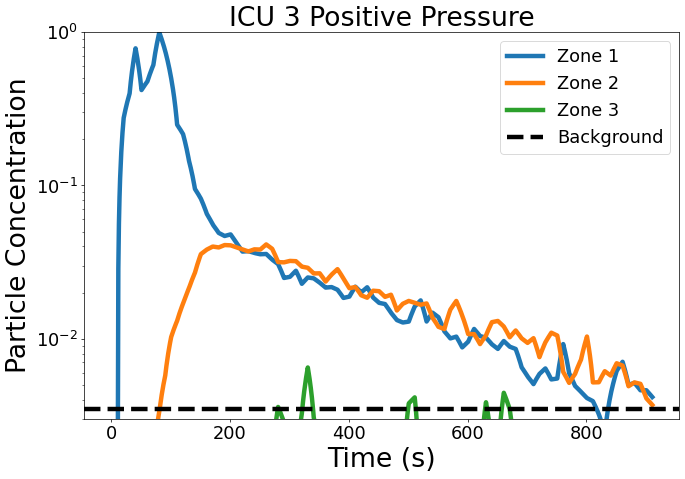

In [29]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 1']/(100*115), linewidth=5.0)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 2']/(100*115), linewidth=5.0)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Zone 3']/(100*115), linewidth=5.0)
plt.title('ICU 3 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(EE502DC_Alt['Zone 1']/(100*115) - 0.0035, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(EE502DC_Alt['Zone 2']/(100*115) - 0.0035, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(EE502DC_Alt['Zone 3']/(100*115) - 0.0035, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((EE502DC_Alt['S-01']+EE502DC_Alt['S-02']+EE502DC_Alt['S-03']+EE502DC_Alt['S-04']+EE502DC_Alt['S-05']+EE502DC_Alt['S-06']+EE502DC_Alt['S-07']+EE502DC_Alt['S-08']+EE502DC_Alt['S-09']+EE502DC_Alt['S-10']+EE502DC_Alt['S-11']+EE502DC_Alt['S-12']+EE502DC_Alt['S-13']+EE502DC_Alt['S-15'])/(100*115))/14 - 0.0035, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((EE502DC_Alt['S-16']+EE502DC_Alt['S-17']+EE502DC_Alt['S-18'])/3)/(100*115) - 0.0035, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(EE502DC_Alt['S-19']/(100*115) - 0.0035, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((EE502DC_Alt['S-01']+EE502DC_Alt['S-02']+EE502DC_Alt['S-03']+EE502DC_Alt['S-04']+EE502DC_Alt['S-05']+EE502DC_Alt['S-06']+EE502DC_Alt['S-07']+EE502DC_Alt['S-08']+EE502DC_Alt['S-09']+EE502DC_Alt['S-10']+EE502DC_Alt['S-11']+EE502DC_Alt['S-12']+EE502DC_Alt['S-13']+EE502DC_Alt['S-15']+EE502DC_Alt['S-16']+EE502DC_Alt['S-17']+EE502DC_Alt['S-18']+EE502DC_Alt['S-19'])/(100*115))/18 - 0.0035, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)


[-0.00334692 -2.45082856]


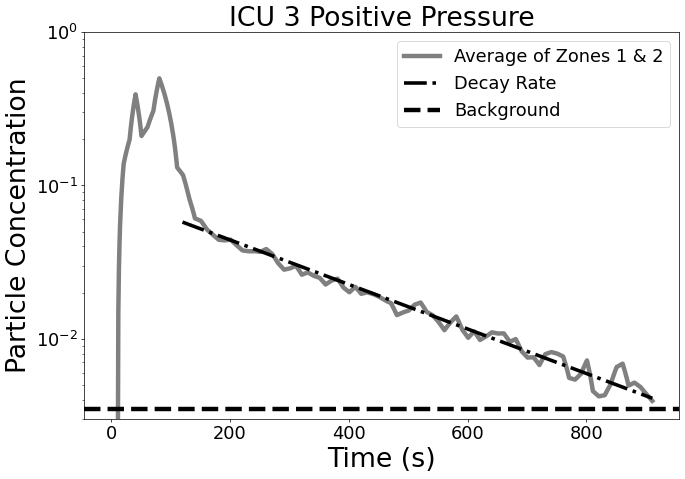

In [30]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502DC_Alt['Time'], EE502DC_Alt['Indoor Average']/(100*115), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 3 Positive Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(EE502DC_Alt['Indoor Average']/(100*115))

time = EE502DC_Alt['Time'][120:920]
y_data = log_y_data[120:920]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0035, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [31]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(EE502NP['Time'], EE502NP['Zone 1']/(100*140))
# plt.semilogy(EE502NP['Time'], EE502NP['Zone 2']/(100*140))
# plt.semilogy(EE502NP['Time'], EE502NP['Zone 3']/(100*140))
# plt.semilogy(EE502NP['Time'], EE502NP['Zone 4']/(100*140))
# plt.semilogy(EE502NP['Time'], EE502NP['Average']/(100*140), linewidth = 3, linestyle = '--')
# #plt.semilogy(EE502NP['Time'], EE502NP['Indoor Average']/(100*140), linewidth = 3, linestyle = '--')
# plt.title('ICU 3 Negative Pressure 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=0.0015, color='black', linestyle='-')

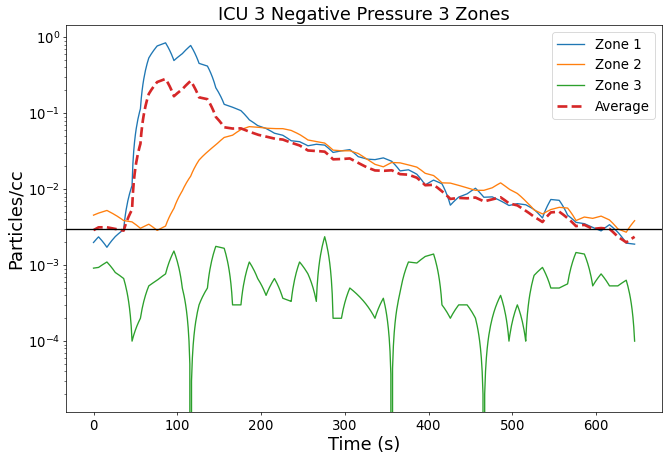

In [32]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 1']/(100*75))
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 2']/(100*75))
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 3']/(100*75))
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Average']/(100*75), linewidth = 3, linestyle = '--')
#plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Indoor Average']/(100*75), linewidth = 3, linestyle = '--')
plt.title('ICU 3 Negative Pressure 3 Zones').set_size(20)
plt.xlabel('Time (s)').set_size(20)
plt.ylabel('Particles/cc').set_size(20)
axes = plt.gca()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Average', 'Indoor Average'], prop = {'size':15})
plt.axhline(y=0.003, color='black', linestyle='-')

Inside = 1.306303730315226
Door Sensors = -0.07133958463130995
Nurse's Station = -0.074233470519237
Outside = -0.07206305610329172


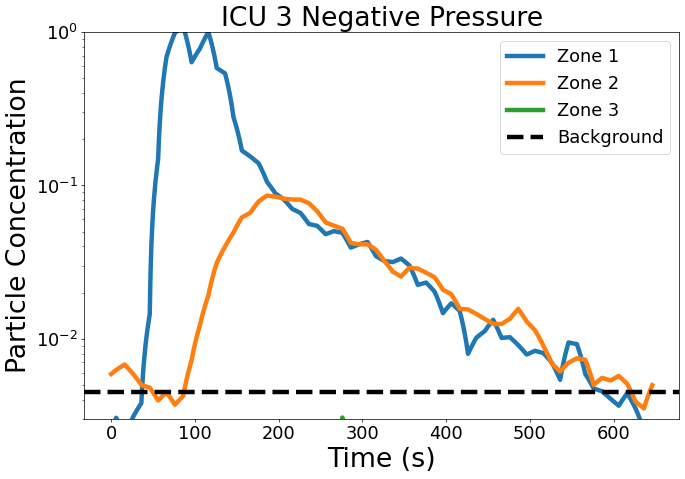

In [33]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 1']/(100*58), linewidth=5.0)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 2']/(100*58), linewidth=5.0)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Zone 3']/(100*58), linewidth=5.0)
plt.title('ICU 3 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.003, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0045, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(EE502NP_Alt['Zone 1']/(100*58) - 0.0045, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(EE502NP_Alt['Zone 2']/(100*58) - 0.0045, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(EE502NP_Alt['Zone 3']/(100*58) - 0.0045, dx=0.01)
#print("area 3 =", area_3)


inside = simps(((EE502NP_Alt['S-01']+EE502NP_Alt['S-02']+EE502NP_Alt['S-03']+EE502NP_Alt['S-04']+EE502NP_Alt['S-05']+EE502NP_Alt['S-06']+EE502NP_Alt['S-07']+EE502NP_Alt['S-08']+EE502NP_Alt['S-09']+EE502NP_Alt['S-10']+EE502NP_Alt['S-11']+EE502NP_Alt['S-12']+EE502NP_Alt['S-13']+EE502NP_Alt['S-15'])/(100*58))/14 - 0.0045, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((EE502NP_Alt['S-16']+EE502NP_Alt['S-17']+EE502NP_Alt['S-18'])/3)/(100*58) - 0.0045, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(EE502NP_Alt['S-19']/(100*58) - 0.0045, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((EE502NP_Alt['S-01']+EE502NP_Alt['S-02']+EE502NP_Alt['S-03']+EE502NP_Alt['S-04']+EE502NP_Alt['S-05']+EE502NP_Alt['S-06']+EE502NP_Alt['S-07']+EE502NP_Alt['S-08']+EE502NP_Alt['S-09']+EE502NP_Alt['S-10']+EE502NP_Alt['S-11']+EE502NP_Alt['S-12']+EE502NP_Alt['S-13']+EE502NP_Alt['S-15']+EE502NP_Alt['S-16']+EE502NP_Alt['S-17']+EE502NP_Alt['S-18']+EE502NP_Alt['S-19'])/(100*58))/18 - 0.0045, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00755077 -0.87877745]


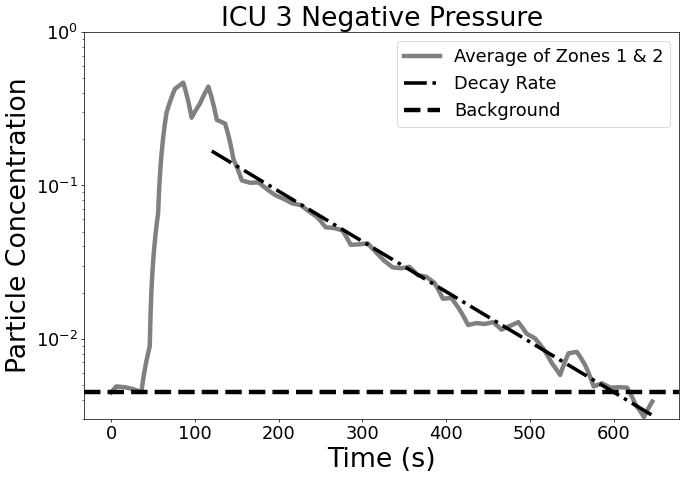

In [34]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE502NP_Alt['Time'], EE502NP_Alt['Indoor Average']/(100*58), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 3 Negative Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.003, 1])

log_y_data = np.log(EE502NP_Alt['Indoor Average']/(100*58))

time = EE502NP_Alt['Time'][120:920]
y_data = log_y_data[120:920]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0045, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})

In [35]:
# fig = plt.figure(1, figsize=(12,8), dpi=64)
# plt.semilogy(EE504DO['Time'], EE504DO['Zone 1']/(100*65))
# plt.semilogy(EE504DO['Time'], EE504DO['Zone 2']/(100*65))
# plt.semilogy(EE504DO['Time'], EE504DO['Zone 3']/(100*65))
# plt.semilogy(EE504DO['Time'], EE504DO['Zone 4']/(100*65))
# plt.semilogy(EE504DO['Time'], EE504DO['Average']/(100*65), linewidth = 3, linestyle = '--')
# #plt.semilogy(EE504DO['Time'], EE504DO['Indoor Average']/(100*65), linewidth = 3, linestyle = '--')
# plt.title('ICU 4 Door Open 4 Zones').set_size(20)
# plt.xlabel('Time (s)').set_size(20)
# plt.ylabel('Particles/cc').set_size(20)
# axes = plt.gca()
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average', 'Indoor Average'], prop = {'size':15})
# plt.axhline(y=.0017, color='black', linestyle='-')

Inside = 1.1988843752155987
Door Sensors = 0.3773526534412423
Nurse's Station = 0.08356078665789225
Outside = 0.3039046867454047


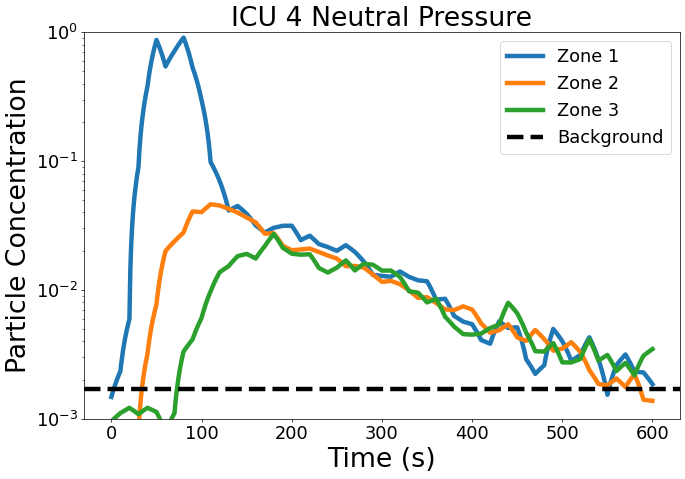

In [36]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 1']/(100*115), linewidth=5.0)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 2']/(100*115), linewidth=5.0)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Zone 3']/(100*115), linewidth=5.0)
plt.title('ICU 4 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.ylim([0.001, 1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(y=0.0017, color='black', linestyle='--', linewidth=5.0)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Background'], prop = {'size':20})

# Compute the area using the composite Simpson's rule.
Zone_1 = simps(EE504DO_Alt['Zone 1']/(100*115) - 0.0017, dx=0.01)
#print("area 1 =", area_1)

# Compute the area using the composite Simpson's rule.
Zone_2 = simps(EE504DO_Alt['Zone 2']/(100*115) - 0.0017, dx=0.01)
#print("area 2 =", area_2)

# Compute the area using the composite Simpson's rule.
Zone_3 = simps(EE504DO_Alt['Zone 3']/(100*115) - 0.0017, dx=0.01)
#print("area 3 =", area_3)



inside = simps(((EE504DO_Alt['S-01']+EE504DO_Alt['S-02']+EE504DO_Alt['S-03']+EE504DO_Alt['S-04']+EE504DO_Alt['S-05']+EE504DO_Alt['S-06']+EE504DO_Alt['S-07']+EE504DO_Alt['S-08']+EE504DO_Alt['S-09']+EE504DO_Alt['S-10']+EE504DO_Alt['S-11']+EE504DO_Alt['S-12']+EE504DO_Alt['S-13']+EE504DO_Alt['S-15'])/(100*115))/14 - 0.0017, dx=0.01)
#print("Inside =", inside)

door_sensors = simps(((EE504DO_Alt['S-16']+EE504DO_Alt['S-17']+EE504DO_Alt['S-18'])/3)/(100*115) - 0.0017, dx=0.01)
#print("Door Sensors =", door_sensors)

nurses_station = simps(EE504DO_Alt['S-19']/(100*115) - 0.0017, dx=0.01)
#print("Nurse's Station =", nurses_station)

total_average = simps(((EE504DO_Alt['S-01']+EE504DO_Alt['S-02']+EE504DO_Alt['S-03']+EE504DO_Alt['S-04']+EE504DO_Alt['S-05']+EE504DO_Alt['S-06']+EE504DO_Alt['S-07']+EE504DO_Alt['S-08']+EE504DO_Alt['S-09']+EE504DO_Alt['S-10']+EE504DO_Alt['S-11']+EE504DO_Alt['S-12']+EE504DO_Alt['S-13']+EE504DO_Alt['S-15']+EE504DO_Alt['S-16']+EE504DO_Alt['S-17']+EE504DO_Alt['S-18']+EE504DO_Alt['S-19'])/(100*115))/18 - 0.0017, dx=0.01)
#print("Total Average =", total_average)

print("Inside =", inside/total_average)
print("Door Sensors =", door_sensors/total_average)
print("Nurse's Station =", nurses_station/total_average)
print("Outside =", Zone_3/total_average)

[-0.00681084 -2.32968537]


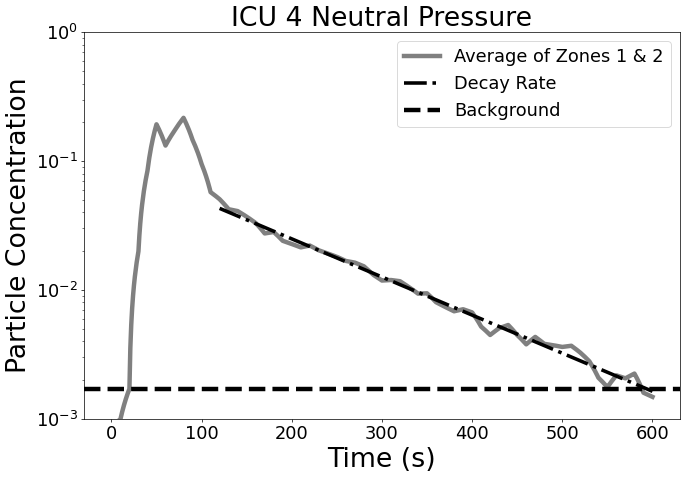

In [37]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(EE504DO_Alt['Time'], EE504DO_Alt['Indoor Average']/(100*115), linewidth = 5, color='gray', linestyle = '-')
plt.title('ICU 4 Neutral Pressure').set_size(30)
plt.xlabel('Time (s)').set_size(30)
plt.ylabel('Particle Concentration').set_size(30)
axes = plt.gca()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim([0.001, 1])

log_y_data = np.log(EE504DO_Alt['Indoor Average']/(100*115))

time = EE504DO_Alt['Time'][120:920]
y_data = log_y_data[120:920]

curve_fit = np.polyfit(time, y_data, 1)
print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*time)
plt.plot(time, y, linewidth=4.0, color='black', linestyle='dashdot')
plt.axhline(y=0.0017, color='black', linestyle='--', linewidth=5.0)

#plt.text(300, 0.075, '$ln(DR) = ln(0.097) - 0.0035t$', fontsize = 20)

plt.legend(['Average of Zones 1 & 2', 'Decay Rate', 'Background'], prop = {'size':20})